In [142]:
import numpy as np
import matplotlib.pyplot as plt

In [143]:
## Constant estimations
def h (x,T,N):
    """
    x = [a_k, phi_k]
    """
    k = np.arange(N)
    return x[0,:]*np.sin(2*np.pi*nu*k*T+x[1,:])

def H_k ():
    x[0]=1
    return np.array([h()])


def sinusoide (a,phi,nu,N,T):
    k = np.arange(N)
    return a*np.sin(2*np.pi*nu*k*T+phi)

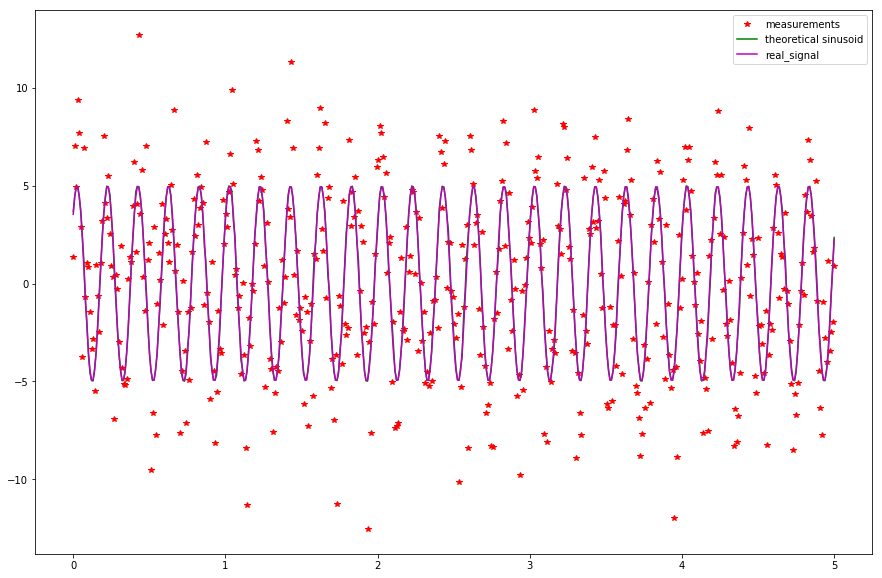

In [186]:
## Problem parameters
N = 500 # Nb of points measured
T_tot = 5 # Total time
T_e = 0.1 # Sample period
nu = 0.5


## State parameters
Q = np.array([[2*1e-5, 0],
              [0, 2*1e-3]]) # state noise
a = 5 # true amplitude
phi = np.pi/4 # true phase


## Theoretical sinusoid 
theo_sinusoide = sinusoide(a,phi,nu,N,T_e)


## Real signal (with signal noise)
x = np.zeros((2,N))
x[0,:] = x[0,:] + np.random.normal(0,scale = np.sqrt(Q[0,0]),size=(1,N))
x[1,:] = x[1,:] + np.random.normal(0,scale=np.sqrt(Q[1,1]),size=(1,N))
x += np.array([[a],
               [phi]])

## Construction of measurements
R = 9
y = h(x,T_e,N) + np.random.normal(0,scale=np.sqrt(R),size=(N,))
real_signal = h(x,T_e,N)

#Plot measurements
plt.figure(figsize=(15,10))
plt.plot(np.linspace(0,T_tot,N),y,'r*', label ='measurements')
plt.plot(np.linspace(0,T_tot,N),real_signal,'g-', label = "theoretical sinusoid")
plt.plot(np.linspace(0,T_tot,N),theo_sinusoide,'m-',label = 'real_signal')

plt.legend()

In [161]:
def kalman_filter(z,param):
    Q,R,nu,T_e = param
    N = z.shape[0]
    
    xhat_history = np.zeros((2,N))
    xhat=np.ones((2,1))
    Phat = np.identity(2)
    k=0
    i=0
    while i<N-1:
        
        Phat = Phat + Q
        H_k = np.array([np.sin(2*np.pi*nu*(i)*T_e+xhat[1]),
                        xhat[0]*np.cos(2*np.pi*nu*(i)*T_e+xhat[1])]).reshape(1,2)
        
        S = (np.dot(H_k,Phat).dot(H_k.T) + R)
        i+=1
  
        K = np.dot(Phat,H_k.T)/S

        epsilon = z[i]-xhat[0]*np.sin(2*np.pi*nu*(i)*T_e+xhat[1])
        
        xhat = (xhat + K*(epsilon))
       
    
        Phat = Phat - np.dot(K,H_k).dot(Phat)
        
        xhat_history[0,i] = xhat[0]
        xhat_history[1,i] = xhat[1]
        
    
    
    return xhat_history

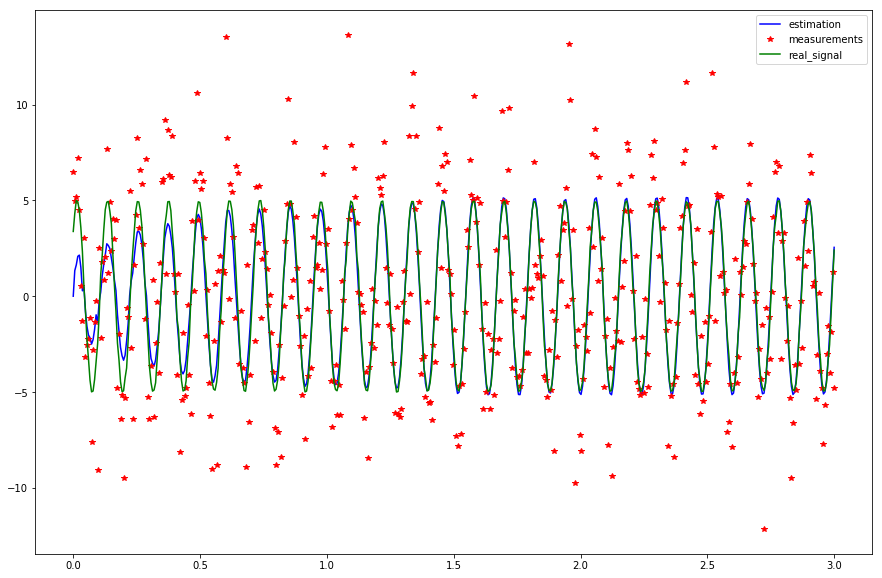

In [165]:
## Problem parameters
N = 500 # Nb of points measured
T_tot = 5 # Total time
T_e = 0.1 # Sample period
nu = 0.5


## State parameters
Q = np.array([[2*1e-5, 0],
              [0, 2*1e-5]]) # state noise
a = 5 # true amplitude
phi = np.pi/4 # true phase



## Real signal (with signal noise)
x = np.zeros((2,N))
x[0,:] = x[0,:] + np.random.normal(0,scale = np.sqrt(Q[0,0]),size=(1,N))
x[1,:] = x[1,:] + np.random.normal(0,scale=np.sqrt(Q[1,1]),size=(1,N))
x += np.array([[a],
               [phi]])

## Construction of measurements
R = 9
y = h(x,T_e,N) + np.random.normal(0,scale=np.sqrt(R),size=(N,))

param = [Q,R,nu,T_e]
xhat_history=kalman_filter(y,param)

plt.figure(figsize=(15,10))
yhat = h(xhat_history,T_e, N)
plt.plot(np.linspace(0,3,N),yhat,'b-', label = 'estimation')
plt.plot(np.linspace(0,3,N),y,'r*',label ='measurements')
plt.plot(np.linspace(0,3,N),real_signal,'g-',label = 'real_signal')
plt.legend()

**Q correspond à la variance du bruit de l'état. S'il est petit, il y a peu de bruit et notre estimation est donc plus efficace ce qui est cohérent.<br> 
Ci dessus, on a pris Q avec des valeurs faibles. <br>
On constate également qu'il y a un petit temps d'adaptation du filtre de kalman.
<br>
<br>
Si on diminue R, la variance du bruit dû à la mesure, l'estimation est meilleure:**

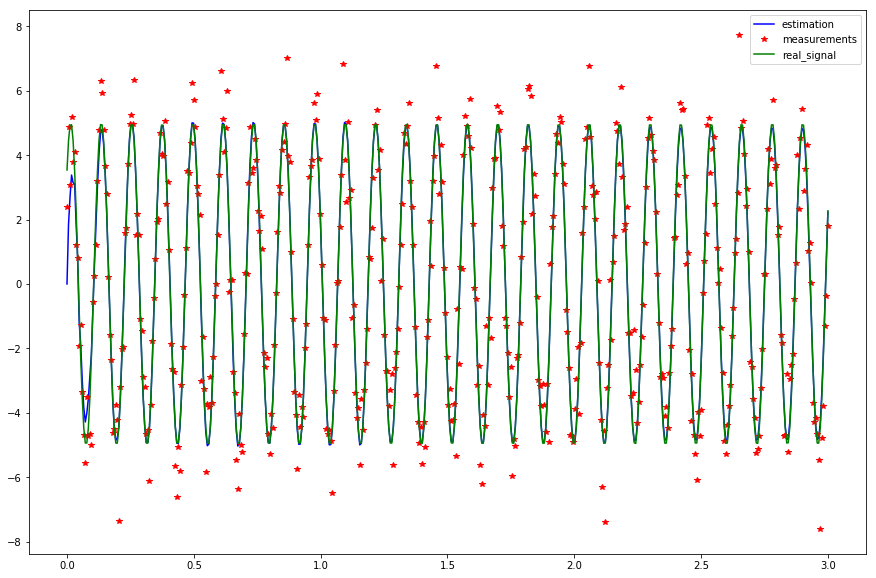

In [175]:
## Problem parameters
N = 500 # Nb of points measured
T_tot = 5 # Total time
T_e = 0.1 # Sample period
nu = 0.5


## State parameters
Q = np.array([[2*1e-5, 0],
              [0, 2*1e-5]]) # state noise
a = 5 # true amplitude
phi = np.pi/4 # true phase



## Real signal (with signal noise)
x = np.zeros((2,N))
x[0,:] = x[0,:] + np.random.normal(0,scale = np.sqrt(Q[0,0]),size=(1,N))
x[1,:] = x[1,:] + np.random.normal(0,scale=np.sqrt(Q[1,1]),size=(1,N))
x += np.array([[a],
               [phi]])

## Construction of measurements
R = 1
y = h(x,T_e,N) + np.random.normal(0,scale=np.sqrt(R),size=(N,))
real_signal = h(x,T_e,N)

param = [Q,R,nu,T_e]
xhat_history=kalman_filter(y,param)

plt.figure(figsize=(15,10))
yhat = h(xhat_history,T_e, N)
plt.plot(np.linspace(0,3,N),yhat,'b-', label = 'estimation')
plt.plot(np.linspace(0,3,N),y,'r*',label ='measurements')
plt.plot(np.linspace(0,3,N),real_signal,'g-',label = 'real_signal')
plt.legend()

**En revanche, avec beaucoup de bruit d'état et de mesure : **

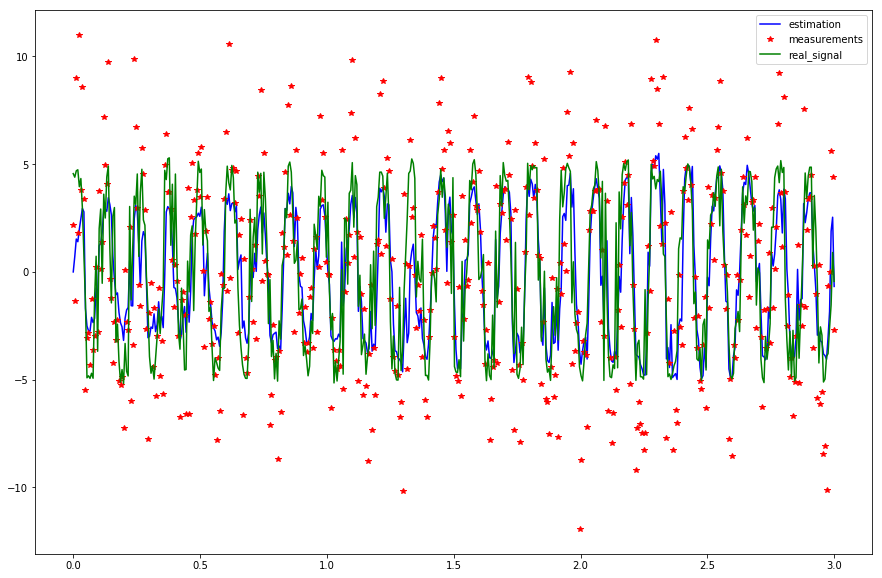

In [179]:
## Problem parameters
N = 500 # Nb of points measured
T_tot = 5 # Total time
T_e = 0.1 # Sample period
nu = 0.5


## State parameters
Q = np.array([[2*1e-2, 0],
              [0, 2*1e-1]]) # state noise
a = 5 # true amplitude
phi = np.pi/4 # true phase



## Real signal (with signal noise)
x = np.zeros((2,N))
x[0,:] = x[0,:] + np.random.normal(0,scale = np.sqrt(Q[0,0]),size=(1,N))
x[1,:] = x[1,:] + np.random.normal(0,scale=np.sqrt(Q[1,1]),size=(1,N))
x += np.array([[a],
               [phi]])

## Construction of measurements
R = 8
y = h(x,T_e,N) + np.random.normal(0,scale=np.sqrt(R),size=(N,))
real_signal = h(x,T_e,N)


param = [Q,R,nu,T_e]
xhat_history=kalman_filter(y,param)

plt.figure(figsize=(15,10))
yhat = h(xhat_history,T_e, N)
plt.plot(np.linspace(0,3,N),yhat,'b-', label = 'estimation')
plt.plot(np.linspace(0,3,N),y,'r*',label ='measurements')
plt.plot(np.linspace(0,3,N),real_signal,'g-',label = 'real_signal')
plt.legend()

**L'estimation est donc moins bonne.**